# Get and explore dataset

In [43]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import re
from keras.preprocessing.text import Tokenizer

In [44]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [45]:
negative_file = "negative.txt"
positive_file = "positive.txt"

In [46]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
  return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [47]:
positive = load_data(positive_file)
negative = load_data(negative_file)

print(positive[0:10])
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']
['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [48]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
from keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))

## Dataset Investigation

Mean review size: 4.336865588399331
Standard deviation of review size: 2.16967555545863


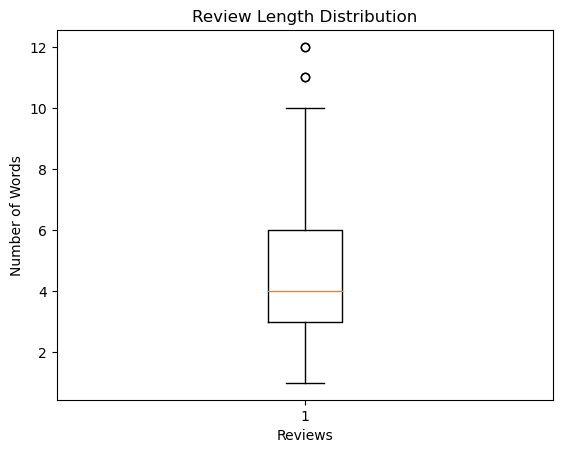

Number of unique words: 2559


In [49]:
# Write some code to investigate the dataset. 
# - Calculate and report the mean review size, its standard deviation and create a boxplot.
review_lengths = [len(review.split()) for review in data]
mean_length = np.mean(review_lengths)
std_length = np.std(review_lengths)

print("Mean review size:", mean_length)
print("Standard deviation of review size:", std_length)

plt.boxplot(review_lengths)
plt.title("Review Length Distribution")
plt.xlabel("Reviews")
plt.ylabel("Number of Words")
plt.show()

# - Calculate the number of unique words in the dataset
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
num_unique_words = len(tokenizer.word_index)

print("Number of unique words:", num_unique_words)

# - Perform any other dataset investigation that you feel would be valuable
 

### Word Frequency Analysis

Calculate the frequency of words in the dataset and identify the most common and least common words. This can help you gain insights into the language used in the reviews and potentially uncover any unique or specialized vocabulary.

Most frequent words:
a: 302
the: 290
book: 186
of: 177
and: 162
for: 123
to: 109
not: 107
this: 97
great: 82
Least frequent words:
prepared: 1
foods: 1
diy: 1
cover: 1
miserable: 1
doublespeak: 1
visit: 1
okay: 1
reefer: 1
madness: 1


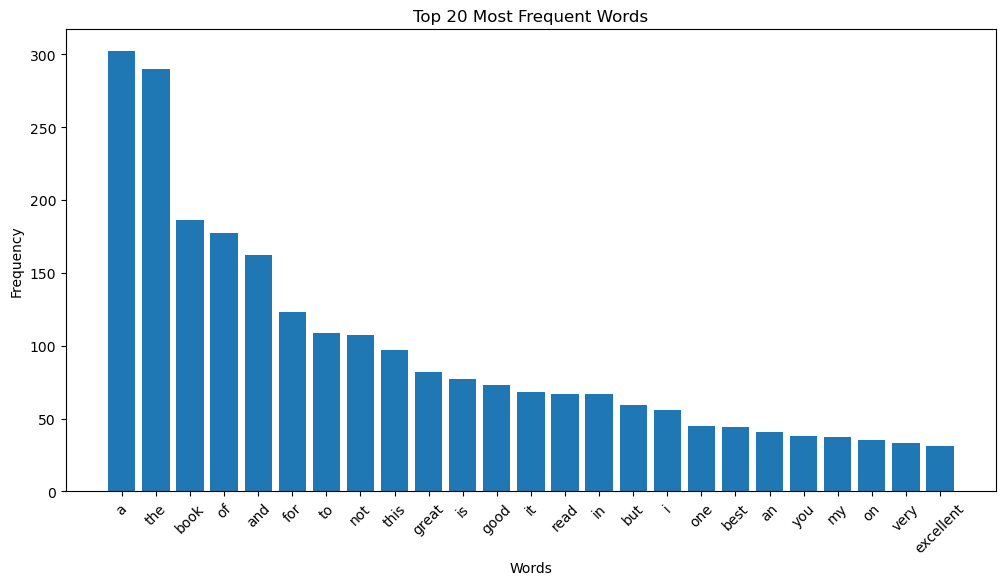

In [50]:
# Word Frequency Analysis
word_frequencies = tokenizer.word_counts
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Print the 10 most frequent words
print("Most frequent words:")
for word, freq in sorted_word_frequencies[:10]:
    print(f"{word}: {freq}")

# Print the 10 least frequent words
print("Least frequent words:")
for word, freq in sorted_word_frequencies[-10:]:
    print(f"{word}: {freq}")

# Plot word frequency distribution
words = [word for word, _ in sorted_word_frequencies]
frequencies = [freq for _, freq in sorted_word_frequencies]

plt.figure(figsize=(12, 6))
plt.bar(words[:25], frequencies[:25])
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

### Wordcloud

Create a word cloud visualization to visually represent the most frequent words in the dataset. Word clouds provide a quick overview of the prominent themes or sentiments expressed in the reviews.

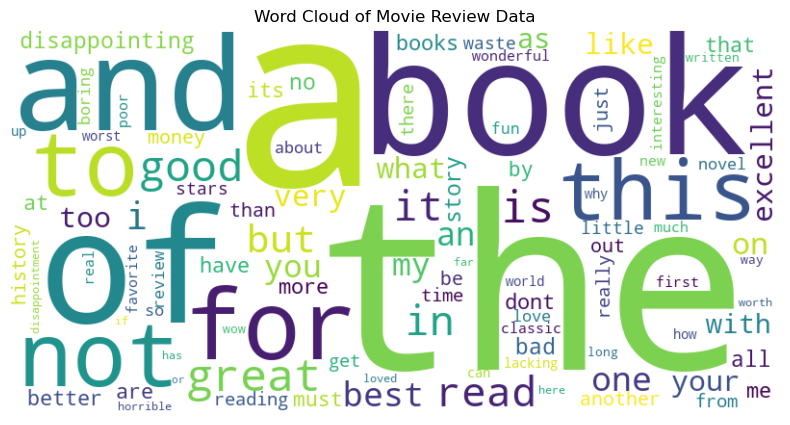

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Preprocess the data
preprocessed_data = [filter_words(review) for review in data]

# Create a word frequency dictionary
word_frequencies = Counter()
for review in preprocessed_data:
    word_frequencies.update(review.split())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(word_frequencies)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Review Data')
plt.show()

### N-Grams Analysis

Explore the occurrence of n-grams (sequences of n words) in the reviews. By analyzing frequently occurring n-grams, you can gain insights into common phrases or expressions used in positive or negative reviews.

In [14]:
from nltk import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter
# uncomment the below if you do not have the required resource
# import nltk
# nltk.download('punkt')

# Combine the positive and negative reviews into a single list
data = positive + negative

# Preprocess the data
preprocessed_data = [filter_words(review) for review in data]

# Tokenize the preprocessed data
tokenized_data = [word_tokenize(review) for review in preprocessed_data]

# Define the N-gram order
n = 2  # Change this value to set the desired N-gram order

# Create a list to store the N-grams
ngram_list = []

# Generate the N-grams
for review_tokens in tokenized_data:
    ngrams_review = list(ngrams(review_tokens, n))
    ngram_list.extend(ngrams_review)

# Count the frequency of N-grams
ngram_frequencies = Counter(ngram_list)

# Print the most common N-grams
print("Most common", n, "-grams:")
for ngram, freq in ngram_frequencies.most_common(10):
    print(ngram, "-", freq)

# Print the least common N-grams
print("Least common", n, "-grams:")
for ngram, freq in ngram_frequencies.most_common()[:-11:-1]:
    print(ngram, "-", freq)

Most common 2 -grams:
('this', 'book') - 45
('of', 'the') - 31
('the', 'best') - 24
('one', 'of') - 23
('great', 'book') - 19
('for', 'the') - 19
('a', 'great') - 17
('in', 'the') - 15
('a', 'good') - 11
('to', 'the') - 11
Least common 2 -grams:
('reefer', 'madness') - 1
('just', 'reefer') - 1
('its', 'just') - 1
('for', 'ideas') - 1
('okay', 'for') - 1
('to', 'visit') - 1
('nice', 'place') - 1
('of', 'doublespeak') - 1
('dictionary', 'of') - 1
('miserable', 'dictionary') - 1


In [52]:
# remove stop words that are just noise
def remove_stopwords(sentences):
    stopwords = ["a", "the", "of", "to", "this", "is", "it", "in", "i", "an", "on"]
    processed_sentences = []
    
    for sentence in sentences:
        words = sentence.split()
        filtered_words = [word for word in words if word.lower() not in stopwords]
        processed_sentence = " ".join(filtered_words)
        processed_sentences.append(processed_sentence)
    
    return processed_sentences

In [53]:
data = remove_stopwords(data)

## Tokenize Vocabulary

In [54]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])

['one best crichton novels', 'medicine future', 'beautiful', 'for lovers robicheaux', 'good book']
[[9, 10, 481, 482], [819, 820], [120], [3, 297, 821], [6, 1]]


# Pre-processing

In [55]:
# Pre-processing
# Write some code to pre-process the data so that each review is the same length
def preprocess_reviews(tokenized_reviews, fixed_length):
    processed_reviews = []
    
    for tokens in tokenized_reviews:
        # Pad or truncate the tokens to the desired length (fixed_length)
        if len(tokens) < fixed_length:
            padded_tokens = tokens + [0] * (fixed_length - len(tokens))
        else:
            padded_tokens = tokens[:fixed_length]
        
        # Add the preprocessed review to the list
        processed_reviews.append(padded_tokens)
    
    return processed_reviews

In [56]:
# apply pre-processing function
processed_reviews = preprocess_reviews(tokenized_data, round(mean_length))

In [57]:
print(processed_reviews)

[[9, 10, 481, 482], [819, 820, 0, 0], [120, 0, 0, 0], [3, 297, 821, 0], [6, 1, 0, 0], [121, 2, 298, 483], [26, 299, 484, 81], [298, 77, 822, 22], [14, 122, 172, 486], [221, 144, 0, 0], [488, 823, 222, 0], [173, 0, 0, 0], [10, 1, 38, 145], [105, 824, 174, 825], [9, 223, 27, 31], [826, 123, 0, 0], [489, 827, 300, 828], [829, 490, 830, 831], [82, 0, 0, 0], [19, 124, 0, 0], [6, 224, 832, 0], [70, 125, 833, 71], [61, 6, 146, 225], [301, 71, 126, 27], [14, 0, 0, 0], [54, 1, 0, 0], [147, 226, 0, 0], [302, 227, 0, 0], [303, 304, 2, 836], [175, 12, 837, 305], [127, 838, 28, 39], [841, 148, 842, 0], [29, 149, 492, 16], [128, 17, 63, 844], [845, 22, 846, 77], [847, 848, 0, 0], [6, 306, 7, 0], [849, 850, 851, 493], [852, 45, 307, 853], [854, 2, 64, 0], [61, 494, 0, 0], [64, 855, 856, 0], [1, 150, 308, 20], [64, 228, 0, 0], [858, 859, 55, 16], [78, 15, 495, 0], [229, 860, 861, 0], [9, 10, 31, 862], [90, 26, 106, 496], [176, 8, 4, 9], [13, 864, 498, 0], [5, 499, 0, 0], [14, 500, 865, 866], [867, 65,

In [58]:
# Write some code to split the data into a training and test set. Make sure you shuffle the data. Use 20% for the test set.
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    processed_reviews, labels, test_size=0.2, random_state=42, shuffle=True
)

# Print the sizes of the training and test sets
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))


Training set size: 1434
Test set size: 359


In [59]:
# Convert input data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

In [60]:

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Fill in the following function so it
# - makes a prediction for the test set given the model
# - reports the precision, recall and f1 score. Also print the confusion matrix. 
# You will need to use the helper to_class function to convert y_pred and y_test before supplying them to the sklearn functions.

def assess_model(model, X_test, y_test):
    # Make predictions for the test set
    y_pred = model.predict(X_test)
    
    # Convert predictions and labels to class labels
    y_pred_classes = to_class(y_pred)
    y_test_classes = to_class(y_test)
    
    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test_classes, y_pred_classes)
    recall = recall_score(y_test_classes, y_pred_classes)
    f1 = f1_score(y_test_classes, y_pred_classes)
    
    # Print precision, recall, and F1 score
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Calculate and print confusion matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    print("Confusion Matrix:")
    print(cm)

# Build and tune model

Define network architecture

In [61]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, BatchNormalization

def build_model(embedding_dim, vocab_size, input_length):
    model = Sequential()
    
    # Embedding layer
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
    
    # SpatialDropout1D
    model.add(SpatialDropout1D(0.2))
    
    # BatchNormalization
    model.add(BatchNormalization())
    
    # LSTM
    model.add(LSTM(32))
    
    # Dense layer
    model.add(Dense(2, activation='softmax'))
    
    return model

# Define the input_length and vocabulary size
vocab_size = len(tokenizer.word_index) + 1
input_length = int(mean_length)


Train model

Epoch 1/7
72/72 [==============================] - 2s 7ms/step - loss: 0.6886 - accuracy: 0.5425 - val_loss: 0.6906 - val_accuracy: 0.5125
Epoch 2/7
72/72 [==============================] - 0s 3ms/step - loss: 0.5546 - accuracy: 0.7552 - val_loss: 0.6354 - val_accuracy: 0.7270
Epoch 3/7
72/72 [==============================] - 0s 3ms/step - loss: 0.3035 - accuracy: 0.8912 - val_loss: 0.6101 - val_accuracy: 0.6462
Epoch 4/7
72/72 [==============================] - 0s 3ms/step - loss: 0.1922 - accuracy: 0.9324 - val_loss: 0.5431 - val_accuracy: 0.7354
Epoch 5/7
72/72 [==============================] - 0s 3ms/step - loss: 0.1399 - accuracy: 0.9547 - val_loss: 0.5623 - val_accuracy: 0.7187
Epoch 6/7
72/72 [==============================] - 0s 3ms/step - loss: 0.1140 - accuracy: 0.9644 - val_loss: 0.6319 - val_accuracy: 0.7047
Epoch 7/7
12/12 [==============================] - 0s 992us/step - loss: 0.6796 - accuracy: 0.7409
Epoch 1/7
72/72 [==============================] - 2s 7ms/step - lo

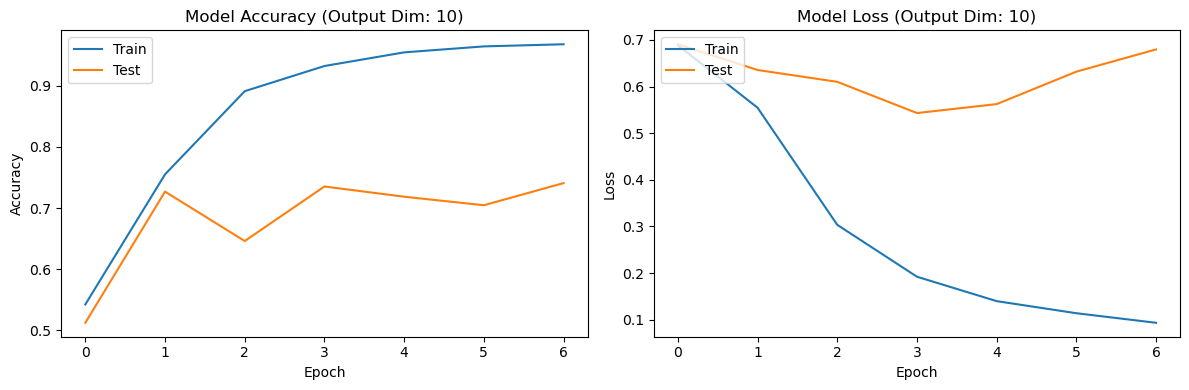

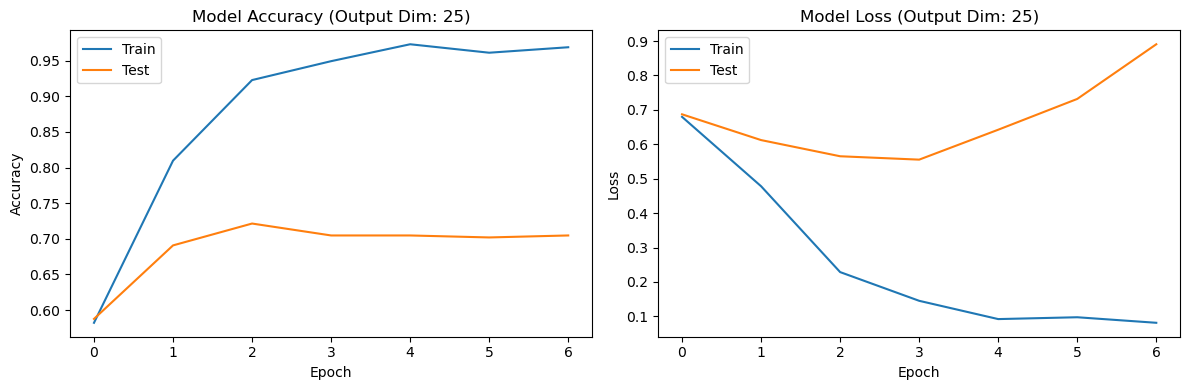

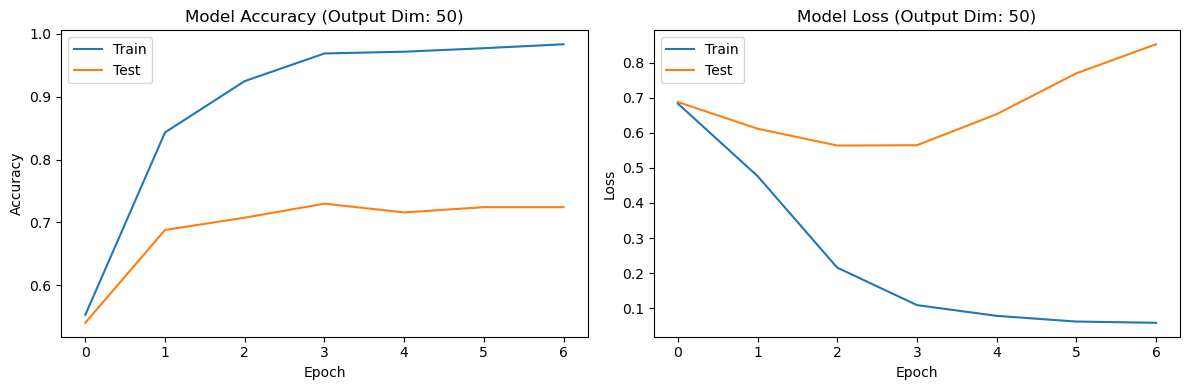

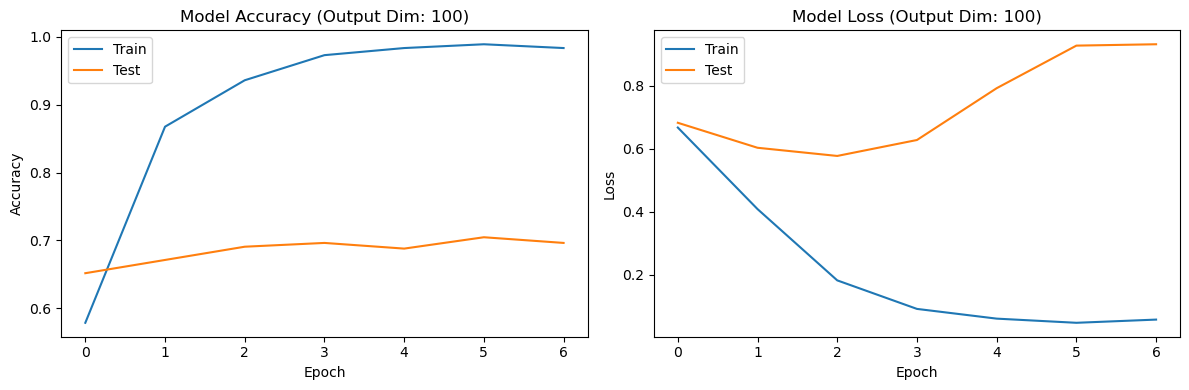

In [62]:
# Tune the output_dim hyper-parameter
output_dims = [10, 25, 50, 100]
performance_metrics = []
history_list = []

for output_dim in output_dims:
    # Define the network architecture
    model = build_model(output_dim, vocab_size, input_length)

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=7, batch_size=20, validation_data=(X_test, y_test))

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test)
    performance_metrics.append((output_dim, accuracy))
    history_list.append(history)

# Find the output_dim with the best performance
best_output_dim, best_accuracy = max(performance_metrics, key=lambda x: x[1])
print(f"Best Output Dim: {best_output_dim}, Best Accuracy: {best_accuracy}")

# Plot the accuracy and loss graphs for each output_dim
for i, output_dim in enumerate(output_dims):
    history = history_list[i]
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model Accuracy (Output Dim: {output_dim})')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model Loss (Output Dim: {output_dim})')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()

The convergence of the accuracy and loss graphs at 4 epochs indicates that the model has reached a point where it has learned the patterns in the training data and achieved a stable level of performance. This suggests that further training may not significantly improve the model's accuracy or reduce its loss.

Convergence implies that the model has successfully captured the important features and patterns required for the given task. It signifies that the model is learning effectively and has found a balance between underfitting and overfitting the data.

Based on the convergence observed at 4 epochs, it is reasonable to consider stopping the training process to avoid overfitting and achieve a good trade-off between model performance and computational efficiency.

In [63]:
# Define the embedding dimension and epochs based on the hyper-parameter tuning above
embedding_dim = 10
epochs = 8

# Build the model
model = build_model(embedding_dim, vocab_size, input_length)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
# Set the batch size
batch_size = 20

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


Epoch 1/8
72/72 [==============================] - 2s 7ms/step - loss: 0.6885 - accuracy: 0.5307 - val_loss: 0.6905 - val_accuracy: 0.5432
Epoch 2/8
72/72 [==============================] - 0s 3ms/step - loss: 0.5588 - accuracy: 0.7503 - val_loss: 0.6374 - val_accuracy: 0.7159
Epoch 3/8
72/72 [==============================] - 0s 3ms/step - loss: 0.3107 - accuracy: 0.8780 - val_loss: 0.5747 - val_accuracy: 0.7242
Epoch 4/8
72/72 [==============================] - 0s 3ms/step - loss: 0.1889 - accuracy: 0.9338 - val_loss: 0.5444 - val_accuracy: 0.7242
Epoch 5/8
72/72 [==============================] - 0s 3ms/step - loss: 0.1571 - accuracy: 0.9428 - val_loss: 0.5754 - val_accuracy: 0.7019
Epoch 6/8
72/72 [==============================] - 0s 3ms/step - loss: 0.1395 - accuracy: 0.9526 - val_loss: 0.6180 - val_accuracy: 0.7242
Epoch 7/8
72/72 [==============================] - 0s 3ms/step - loss: 0.0990 - accuracy: 0.9644 - val_loss: 0.7185 - val_accuracy: 0.7214
Epoch 8/8
72/72 [==========

Examine performance of model

In [65]:
# Use the assess_model function to evaluate the model
assess_model(model, X_test, y_test)


12/12 [==============================] - 0s 1ms/step
Precision: 0.73224043715847
Recall: 0.73224043715847
F1 Score: 0.73224043715847
Confusion Matrix:
[[127  49]
 [ 49 134]]


Plot graphs for accuracy and loss

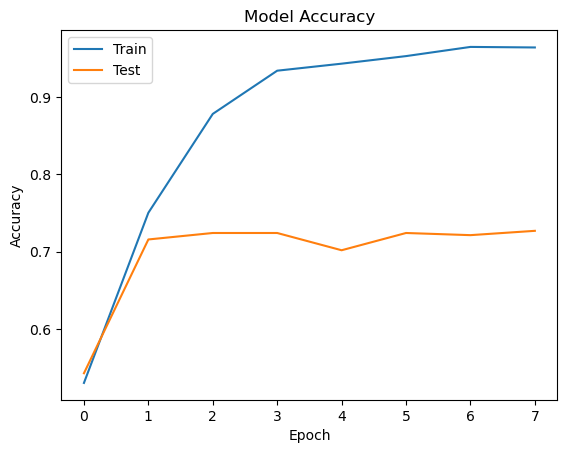

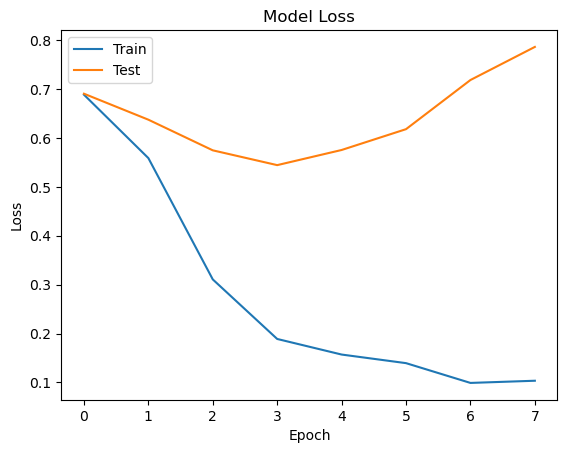

In [66]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Make a prediction

In [67]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# This is a very small set of completed new data to use to make predictions.
prediction_data = ["this book is fabulous","i hated this book", "the best", "no good", "okay"]
tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = pad_sequences(tokenized, padding='post', maxlen=input_length)

# Supply this data to each of your models and see how it does. 
# You can call the helper function "to_word_label" to map the output of the model to the name of the
# class it was predicted to belong to.

# Make predictions using the model
predictions = model.predict(padded)

# Map the predicted labels to their corresponding names
predicted_labels = to_word_label(predictions)

# Print the predictions
for i in range(len(prediction_data)):
    print("Review:", prediction_data[i])
    print("Prediction:", predicted_labels[i])
    print()





1/1 [==============================] - 0s 275ms/step
Review: this book is fabulous
Prediction: positive

Review: i hated this book
Prediction: negative

Review: the best
Prediction: positive

Review: no good
Prediction: negative

Review: okay
Prediction: negative

